In [1]:
import matplotlib.pyplot as plt

def read_log(log_file):
    with open(log_file, 'r') as f:
        lines = f.readlines()
    return lines[0], lines[2:]

def process_first_line(line):
    line = line[:-1]
    d = dict()
    vars = line.split(', ')
    for var in vars:
        assignment = var.split('=')
        name, value = assignment[0], assignment[1]
        d[name] = value
    return d

def process_line(line):
    values = line.split(', ')
    return int(values[0]), int(values[2])

def plot_graph(log_file, seconds, counts):
    fig, ax = plt.subplots()
    ax.plot(seconds, counts, 'o')
    ax.set(xlabel='seconds (s)', ylabel='human pixels', title='Human presence in video \n{}'.format(log_file[:-4]))
    ax.grid()
    plt.show()

def process_log_file(log_file):
    first_line, lines = read_log(log_file)
    vars = process_first_line(first_line)
    frame_rate = float(vars['frame_rate'])
    print('start_time={}, frame_rate={}'.format(vars['start_time'], frame_rate))
    frames = []
    counts = []
    for line in lines:
        frame, count = process_line(line)
        frames.append(frame)
        counts.append(count)
    frame_period = 1. / frame_rate
    seconds = [frame * frame_period for frame in frames]
    plot_graph(log_file, seconds, counts)

start_time=2020/03/07 01:25:40, frame_rate=30.0


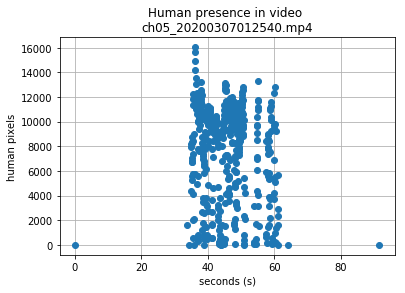

In [2]:
process_log_file('ch05_20200307012540.mp4.txt')

start_time=2020/03/07 01:25:40, frame_rate=30.0


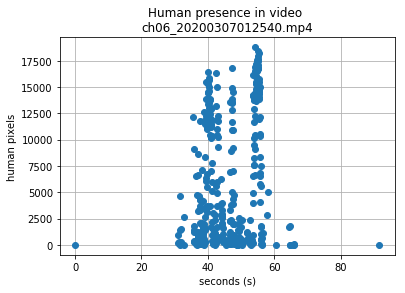

In [3]:
process_log_file('ch06_20200307012540.mp4.txt')